In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('data/train.csv')
df

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,27619,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,16444,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,25076,27,admin.,married,professional.course,no,yes,no,cellular,may,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,4587,55,retired,married,high.school,no,yes,no,telephone,may,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [3]:
df.shape

(22500, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        22500 non-null  int64  
 1   age             22500 non-null  int64  
 2   job             22500 non-null  object 
 3   marital         22500 non-null  object 
 4   education       22500 non-null  object 
 5   default         22500 non-null  object 
 6   housing         22500 non-null  object 
 7   loan            22500 non-null  object 
 8   contact         22500 non-null  object 
 9   month           22500 non-null  object 
 10  day_of_week     22500 non-null  object 
 11  duration        22500 non-null  int64  
 12  campaign        22500 non-null  int64  
 13  pdays           22500 non-null  int64  
 14  previous        22500 non-null  int64  
 15  poutcome        22500 non-null  object 
 16  emp.var.rate    22500 non-null  float64
 17  cons.price.idx  22500 non-null 

In [5]:
df.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [6]:
df_test = pd.read_csv('data/test.csv')
df_test

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14664,37,technician,single,professional.course,no,yes,yes,cellular,aug,...,3309,1,471,0,success,1.4,92.325519,-33.010270,3.562675,5028.544435
1,25250,26,admin.,single,high.school,no,yes,no,cellular,may,...,2757,2,159,2,success,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,4070,42,blue-collar,married,basic.6y,no,no,no,telephone,may,...,266,3,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000
3,19446,38,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,29,1,433,5,success,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,5111,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1684,2,938,3,success,1.1,93.983679,-35.267269,3.833161,5183.822823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,25105,50,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3969,48,290,1,failure,-1.8,94.077494,-39.985944,3.709514,5033.480618
7496,13297,35,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,596,8,424,3,failure,1.4,93.302019,-49.737088,1.766907,5095.562948
7497,26780,53,retired,single,basic.4y,no,yes,no,cellular,jun,...,107,3,999,0,nonexistent,-2.9,92.963000,-40.800000,1.281000,5076.200000
7498,16186,32,technician,married,professional.course,no,no,no,cellular,aug,...,172,3,999,0,nonexistent,1.4,93.444000,-36.100000,4.963000,5228.100000


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        7500 non-null   int64  
 1   age             7500 non-null   int64  
 2   job             7500 non-null   object 
 3   marital         7500 non-null   object 
 4   education       7500 non-null   object 
 5   default         7500 non-null   object 
 6   housing         7500 non-null   object 
 7   loan            7500 non-null   object 
 8   contact         7500 non-null   object 
 9   month           7500 non-null   object 
 10  day_of_week     7500 non-null   object 
 11  duration        7500 non-null   int64  
 12  campaign        7500 non-null   int64  
 13  pdays           7500 non-null   int64  
 14  previous        7500 non-null   int64  
 15  poutcome        7500 non-null   object 
 16  emp.var.rate    7500 non-null   float64
 17  cons.price.idx  7500 non-null   f

In [8]:
df.drop(columns=['RecordID'], axis=1, inplace=True)

In [9]:
def unknown_count(data):
    print("unknown counts\n")
    column_list = data.select_dtypes('O').columns.to_list()
    for i in column_list:
        for j in data[i].unique():
            if j == 'unknown':
                print(i,': ',data[i].value_counts()['unknown'])
                
    print("\nunknown in dataframe",)
    sns.heatmap((data.sort_values(by=['default'], ignore_index=True) == 'unknown'), cbar=False)
    plt.show()

unknown counts

job :  274
marital :  320
education :  994
default :  4860
housing :  886
loan :  889

unknown in dataframe


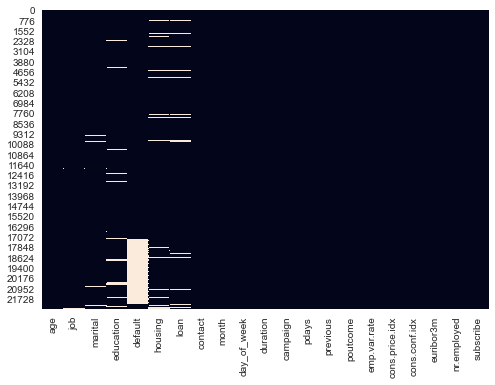

In [10]:
unknown_count(df)

unknown counts

job :  84
marital :  131
education :  336
default :  1597
housing :  300
loan :  306

unknown in dataframe


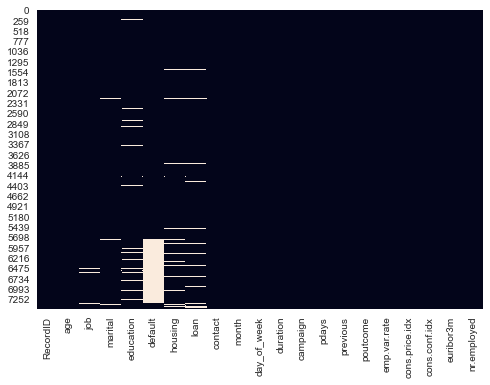

In [11]:
unknown_count(df_test)

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,52,services,married,high.school,unknown,yes,no,cellular,may,mon,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,admin.,married,high.school,no,no,no,cellular,aug,fri,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,27,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,55,retired,married,high.school,no,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [14]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

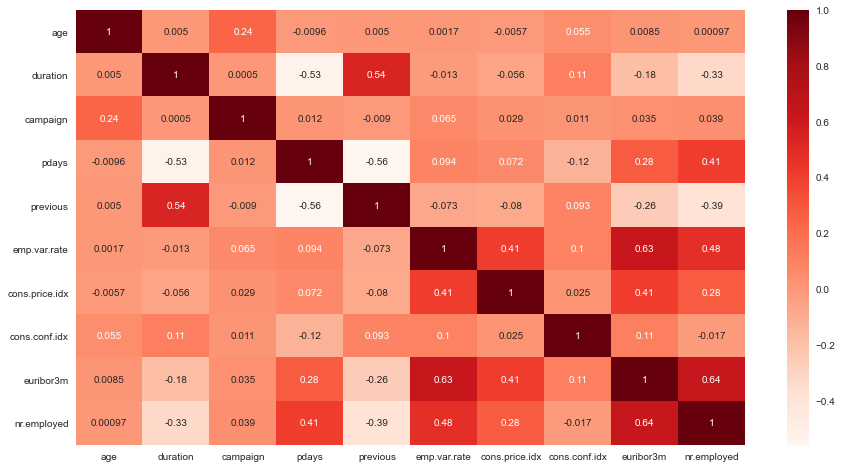

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.show()

In [16]:
def compare_categories_in_column(df, column_name):
    # Title
    print(column_name)
    print("-"*len(column_name))
    
    # Table
    table = pd.DataFrame(df[column_name].value_counts().reset_index())
    table.columns = [column_name+'_category', 'count']
    table.index += 1
    table['percentage'] = (table['count'] / table['count'].sum() * 100).round(2)
    display(table)

    # Plot
    ax = sns.countplot(y=column_name, data=df, palette='dark')
    plt.show()

job
---


,job_category,count,percentage
1,admin.,5557,24.70
2,blue-collar,4874,21.66
3,technician,3530,15.69
4,services,2083,9.26
5,management,1600,7.11
6,retired,1006,4.47
7,entrepreneur,863,3.84
8,self-employed,836,3.72
9,housemaid,657,2.92
10,unemployed,647,2.88


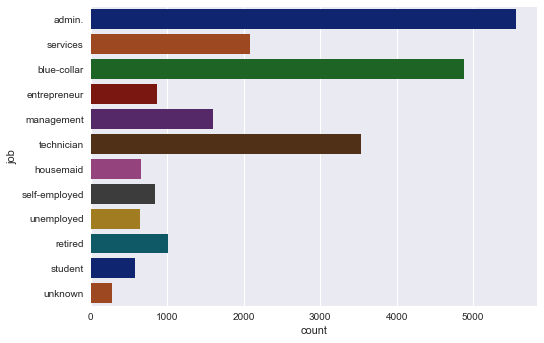

marital
-------


,marital_category,count,percentage
1,married,13178,58.57
2,single,6344,28.20
3,divorced,2658,11.81
4,unknown,320,1.42


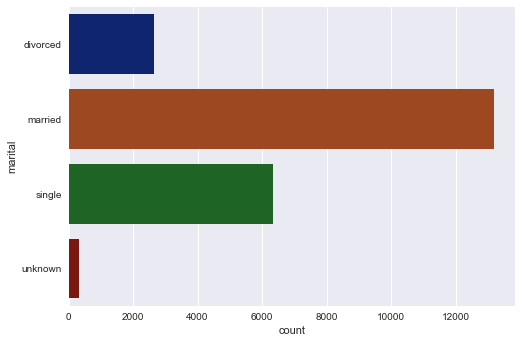

education
---------


,education_category,count,percentage
1,university.degree,6524,29.00
2,high.school,5031,22.36
3,basic.9y,3266,14.52
4,professional.course,2853,12.68
5,basic.4y,2322,10.32
6,basic.6y,1349,6.00
7,unknown,994,4.42
8,illiterate,161,0.72


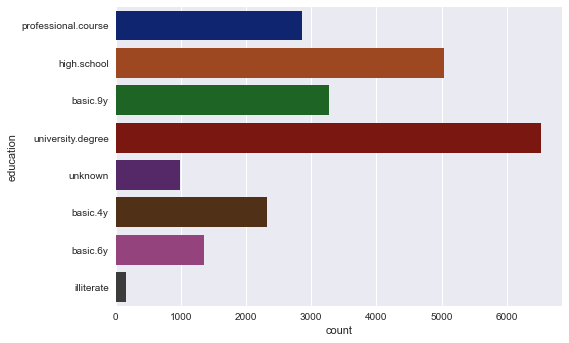

default
-------


,default_category,count,percentage
1,no,17261,76.72
2,unknown,4860,21.60
3,yes,379,1.68


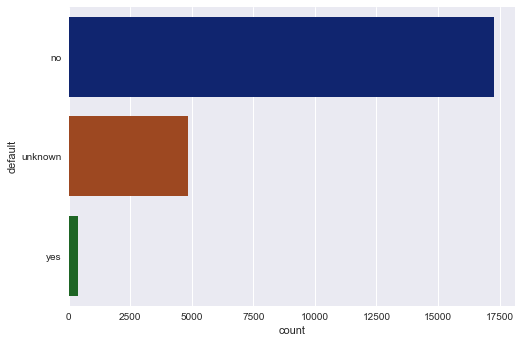

housing
-------


,housing_category,count,percentage
1,yes,11568,51.41
2,no,10046,44.65
3,unknown,886,3.94


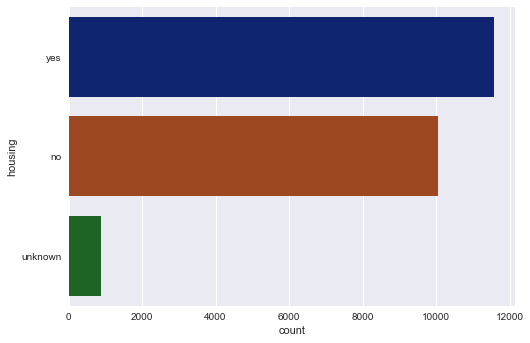

loan
----


,loan_category,count,percentage
1,no,17954,79.80
2,yes,3657,16.25
3,unknown,889,3.95


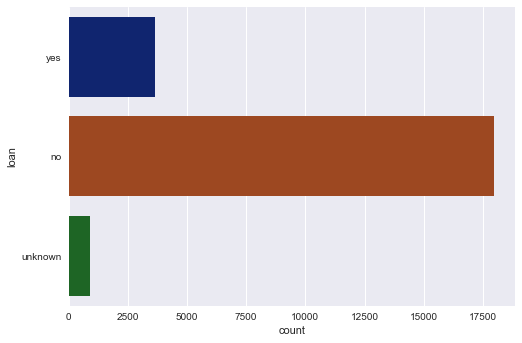

contact
-------


,contact_category,count,percentage
1,cellular,14181,63.03
2,telephone,8319,36.97


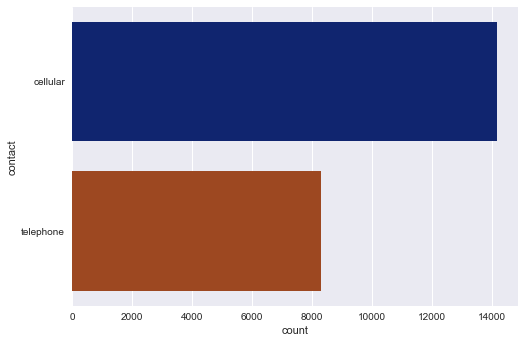

month
-----


,month_category,count,percentage
1,may,7235,32.16
2,jul,3815,16.96
3,aug,3340,14.84
4,jun,2838,12.61
5,nov,2242,9.96
6,apr,1510,6.71
7,oct,494,2.20
8,mar,426,1.89
9,sep,401,1.78
10,dec,199,0.88


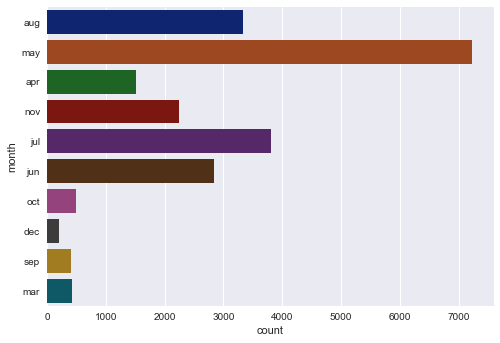

day_of_week
-----------


,day_of_week_category,count,percentage
1,thu,4728,21.01
2,mon,4653,20.68
3,wed,4458,19.81
4,tue,4414,19.62
5,fri,4247,18.88


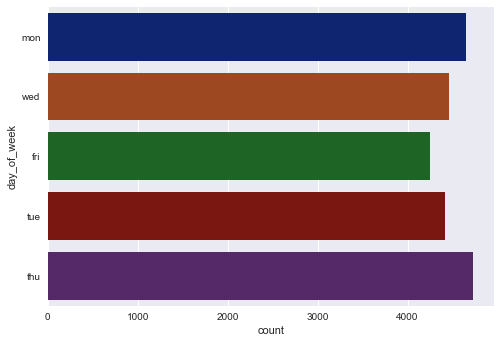

poutcome
--------


,poutcome_category,count,percentage
1,nonexistent,14618,64.97
2,failure,4442,19.74
3,success,3440,15.29


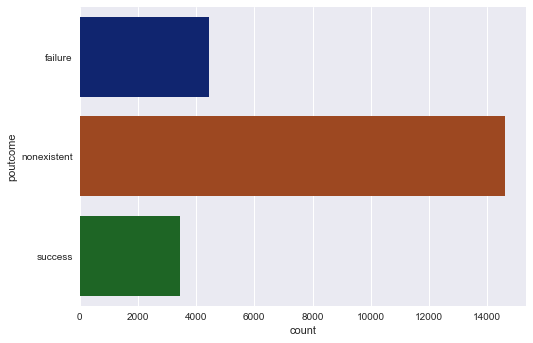

subscribe
---------


,subscribe_category,count,percentage
1,no,19548,86.88
2,yes,2952,13.12


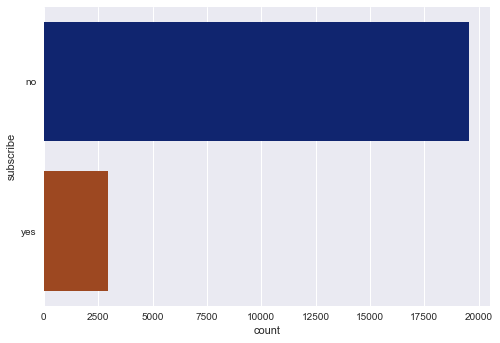

In [17]:
for i in df.select_dtypes('O').columns.to_list():
    compare_categories_in_column(df, i)

In [48]:
for i in df.select_dtypes('O').columns.to_list():
    categories = df[i].unique()
    contain_unknown = False
    
    for j in categories:
        if j == 'unknown':
            contain_unknown = True
    
    if contain_unknown:
        index = np.argwhere(categories == 'unknown')[0][0]
        categories = np.roll(categories, -index)
        
    df[i].replace(categories, range(len(categories)), inplace=True)

In [49]:
x = df.drop('subscribe', axis=1)
y = df.subscribe

In [55]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
os = RandomOverSampler(random_state=42)

In [57]:
x_overSample, y_overSample = os.fit_resample(x, y)

In [58]:
def Counter(y):
    output = {}
    for i in y.value_counts().index:
        output[i] = y.value_counts()[i]
    return str(output)

In [59]:
print("Original: {}".format(Counter(y)))
print("After Over Sampling: {}".format(Counter(y_overSample)))

Original: {0: 19548, 1: 2952}
After Over Sampling: {0: 19548, 1: 19548}


In [29]:
# def compare_to_subscribe(coloum_name):
    
#     # Comparing values
#     df['subscribe_count'] = df['subscribe']
#     pivot_table = df.pivot_table(
#          index=[coloum_name, 'subscribe'],
#          values='subscribe_count',
#         aggfunc=np.count_nonzero
#     )
#     df.drop(columns=['subscribe_count'], axis=1)
#     display(pivot_table)
    
#     # Create a bar graph that shows the relationship between "some_coloum" and "subscribe"
#     sns.countplot(y=coloum_name, hue='subscribe', data=df, palette='dark')

#     # Add a title and labels
#     plt.title(coloum_name + ' vs subscribe')
#     plt.ylabel(coloum_name)
#     plt.xlabel('count')

#     plt.xticks(rotation=45)
#     plt.grid(visible=True, color='gray', linestyle='-.', linewidth=0.5)

#     # Show the plot
#     plt.show()

subscribe_count
poutcome    subscribe                 
failure     no                    3777
            yes                    665
nonexistent no                   13014
            yes                   1604
success     no                    2757
            yes                    683

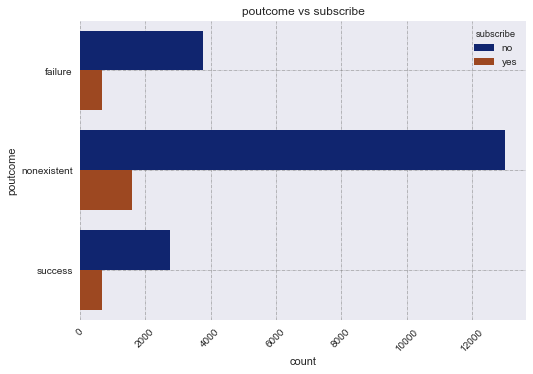

In [30]:
# compare_to_subscribe('poutcome')

In [31]:
# df['subscribe_count'] = df['subscribe']
# pivot_table = df.pivot_table(
#      index=['poutcome', 'subscribe'],
#      values='subscribe_count',
#     aggfunc=np.count_nonzero
# )
# df.drop(columns=['subscribe_count'], axis=1)
# display(pivot_table)

# pivot_table['subscribe*100/poutcome'] = np.nan

subscribe_count
poutcome    subscribe                 
failure     no                    3777
            yes                    665
nonexistent no                   13014
            yes                   1604
success     no                    2757
            yes                    683

In [32]:
# for i in range(0, len(pivot_table.index), len(df['subscribe'].unique())):
#     total = pivot_table.loc[pivot_table.index[i][0]]['subscribe_count'].sum()
#     pivot_table['subscribe*100/poutcome'][i] = pivot_table['subscribe_count'][i] * 100 / total
#     pivot_table['subscribe*100/poutcome'][i+1] = pivot_table['subscribe_count'][i+1] * 100 / total
# pivot_table

c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


subscribe_count  subscribe*100/poutcome
poutcome    subscribe                                         
failure     no                    3777               85.029266
            yes                    665               14.970734
nonexistent no                   13014               89.027227
            yes                   1604               10.972773
success     no                    2757               80.145349
            yes                    683               19.854651

subscribe_count
marital  subscribe                 
divorced no                    2306
         yes                    352
married  no                   11767
         yes                   1411
single   no                    5301
         yes                   1043
unknown  no                     174
         yes                    146

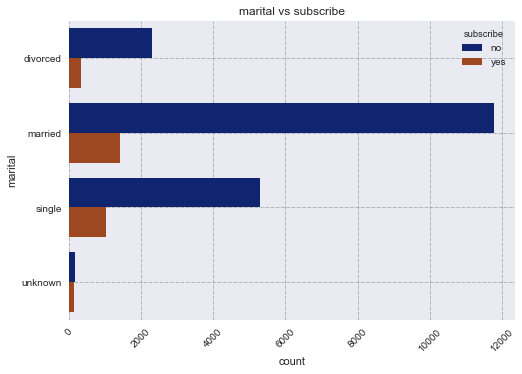

In [33]:
# compare_to_subscribe('marital')

In [22]:
# compare_to_subscribe('education')

In [23]:
# compare_to_subscribe('default')

In [24]:
# compare_to_subscribe('housing')

In [25]:
# compare_to_subscribe('loan')

In [26]:
# compare_to_subscribe('contact')

In [27]:
# compare_to_subscribe('month')

In [28]:
# compare_to_subscribe('day_of_week')